In [1]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
tk = th.Thicket.from_caliperreader(glob("../cali_files/radix/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:01<00:00, 167.06it/s]
/home/matthew/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [3]:
tk.metadata.head()

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,
4470530,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p16-a67108864-sradix-irandom.cali,true,true,true,true,1729634306,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 67108864, radix, random]",c,radix,mpi,int,4,67108864,random,16,8,online
4878226,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a1048576-sradix-i1perturbed.cali,true,true,true,true,1729639993,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 1048576, radix, 1perturbed]",c,radix,mpi,int,4,1048576,1perturbed,32,8,online
28339909,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a262144-sradix-ireverse.cali,true,true,true,true,1729639001,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 262144, radix, reverse]",c,radix,mpi,int,4,262144,reverse,64,8,online
30793891,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p16-a67108864-sradix-isorted.cali,true,true,true,true,1729634203,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 67108864, radix, sorted]",c,radix,mpi,int,4,67108864,sorted,16,8,online
55640694,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a268435456-sradix-i1perturbed.cali,true,true,true,true,1729643529,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, radix, 1perturbed]",c,radix,mpi,int,4,268435456,1perturbed,128,8,online


In [4]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

8.236 main
├─ 1.826 MPI_Comm_dup
├─ 0.021 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 2.457 comm
│  └─ 2.457 comm_large
│     ├─ 0.039 MPI_Allreduce
│     ├─ 0.015 MPI_Alltoall
│     ├─ 0.053 MPI_Alltoallv
│     ├─ 0.270 MPI_Bcast
│     ├─ 0.012 MPI_Gather
│     ├─ 1.958 MPI_Gatherv
│     └─ 0.109 MPI_Scatterv
├─ 0.656 comp
│  ├─ 0.627 comp_large
│  └─ 0.029 comp_small
├─ 0.115 correctness_check
└─ 0.169 data_init_runtime
   └─ 0.033 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 8.24 indices: {'profile': 4470530})
█ 7.41 - 8.24
█ 5.76 - 7.41
█ 4.12 - 5.76
█ 2.47 - 4.12
█ 0.82 - 2.47
█ 0.00 - 0.82

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size
0,"{'name': 'main', 'type': 'function'}",4470530,1.0,regionprofile,8.233256,8.236598,8.235710,131.771367,0.000001,1.280026,4.765325,2.991643,47.866295,NaN,NaN,NaN,NaN,main,16,random,67108864
1,"{'name': 'main', 'type': 'function'}",4878226,1.0,regionprofile,2.006269,2.015073,2.010734,64.343475,0.000010,1.502711,1.885791,1.521473,48.687146,NaN,NaN,NaN,NaN,main,32,1perturbed,1048576
2,"{'name': 'main', 'type': 'function'}",28339909,1.0,regionprofile,1.637597,1.650236,1.643697,105.196592,0.000016,1.502610,1.602831,1.513377,96.856108,NaN,NaN,NaN,NaN,main,64,reverse,262144
3,"{'name': 'main', 'type': 'function'}",30793891,1.0,regionprofile,45.740400,45.743991,45.742583,731.881326,0.000002,0.938780,42.342996,3.534930,56.558884,NaN,NaN,NaN,NaN,main,16,sorted,67108864
4,"{'name': 'main', 'type': 'function'}",55640694,1.0,regionprofile,31.462184,31.536153,31.521413,4034.740908,0.000175,1.684317,20.311017,2.697686,345.303756,NaN,NaN,NaN,NaN,main,128,1perturbed,268435456


In [6]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

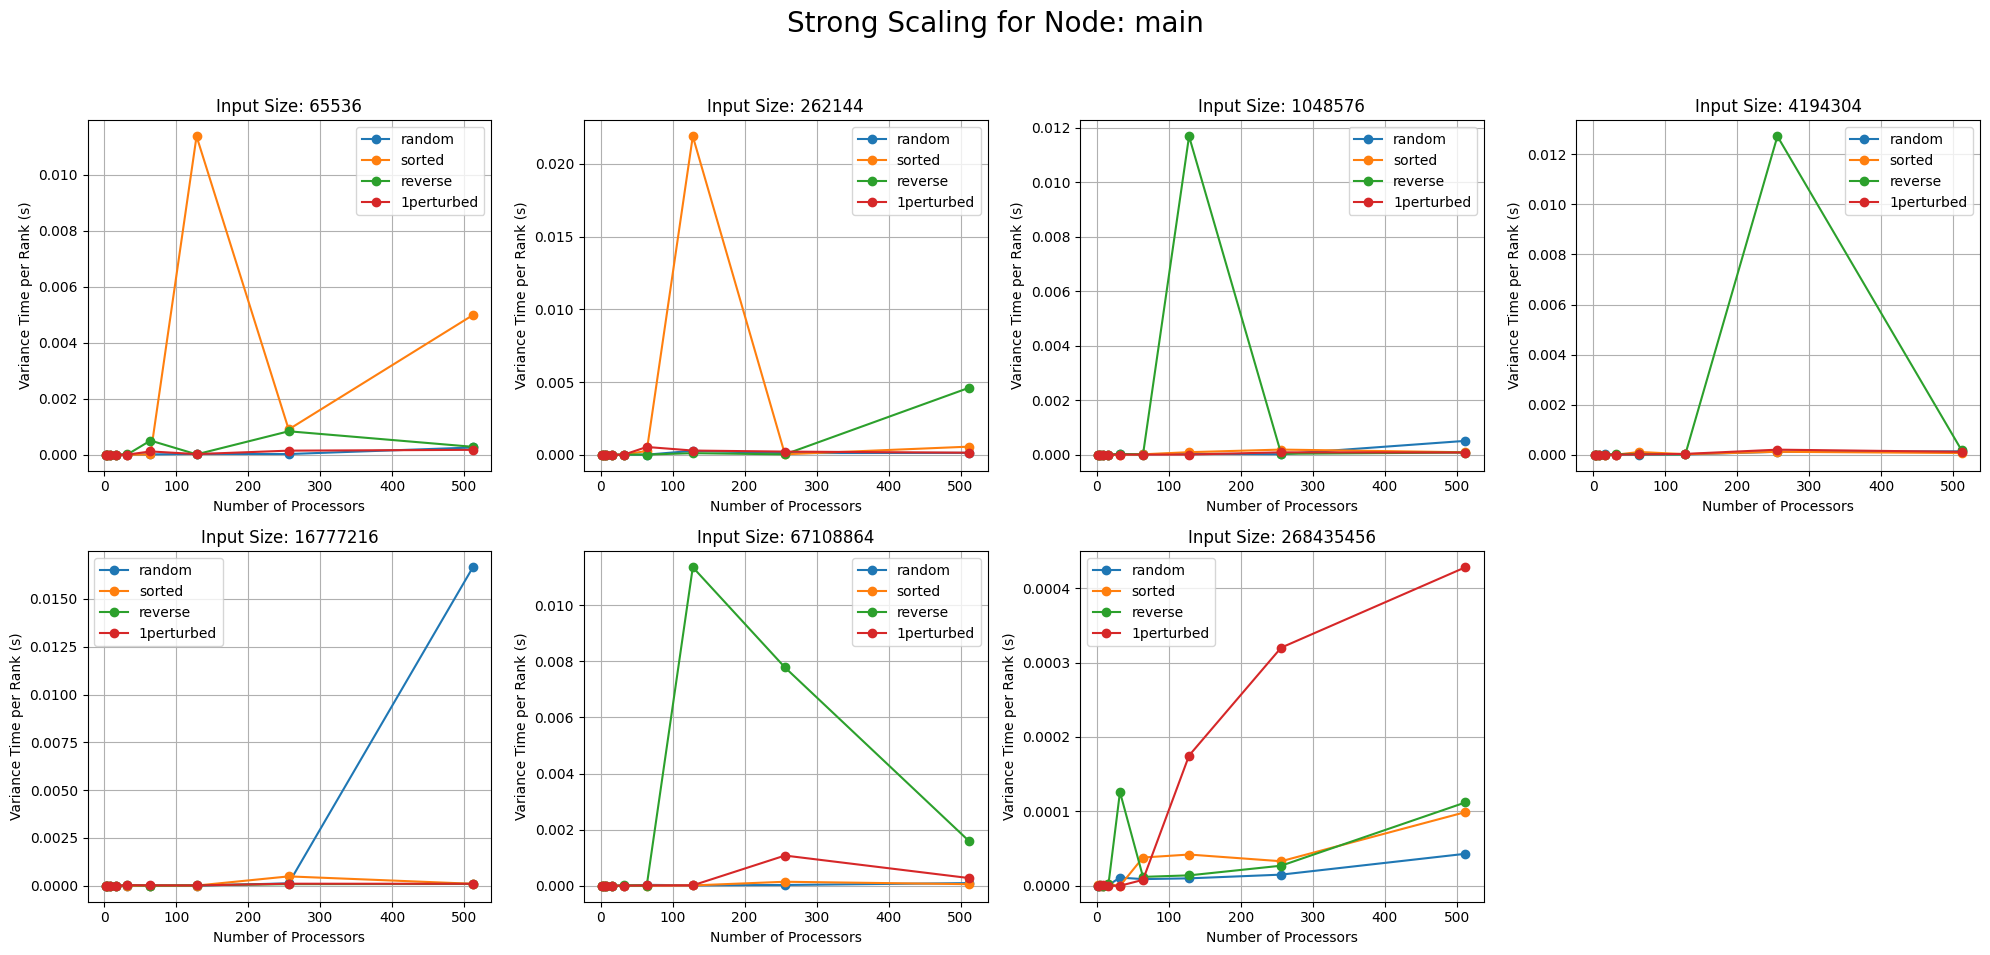

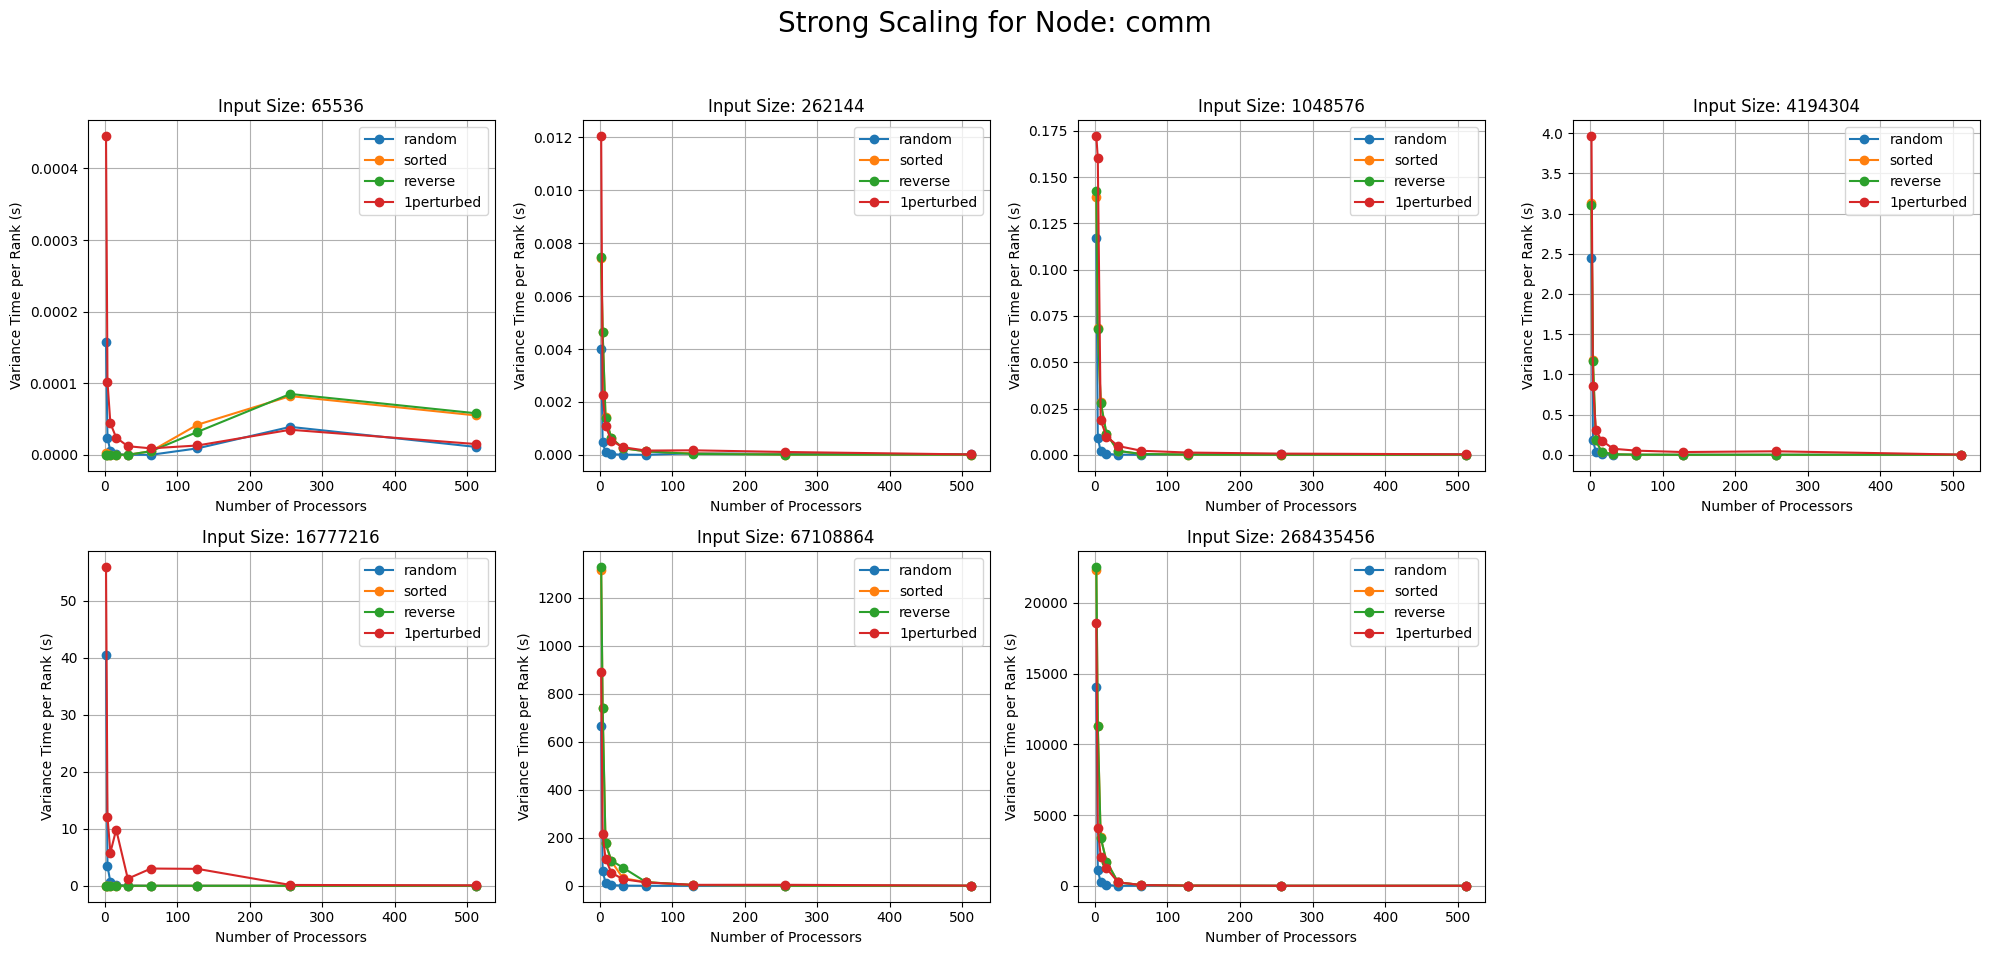

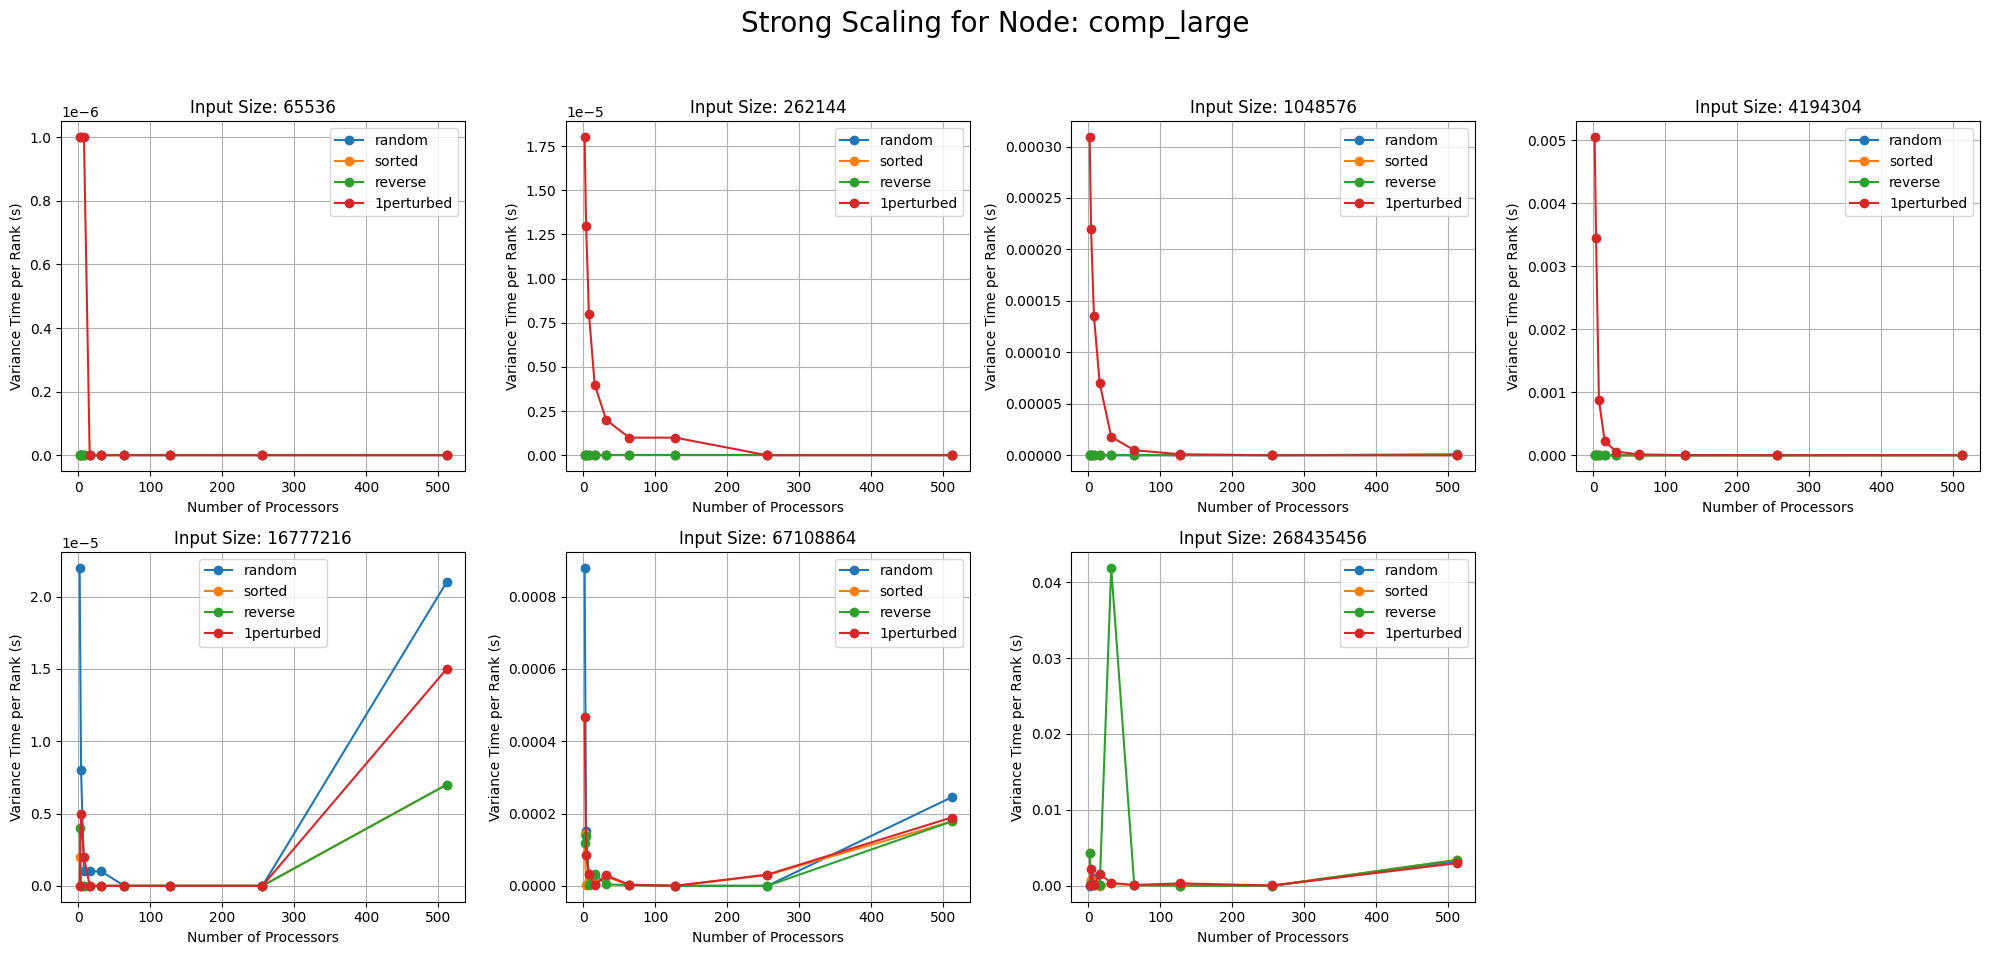

In [10]:
import os

input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
xlabels = ["Min Time per Rank (s)", "Max Time per Rank (s)", "Avg Time per Rank (s)", "Total Time per Rank (s)", "Variance Time per Rank (s)"]
time_types = ["Min time/rank", "Max time/rank", "Avg time/rank", "Total time", "Variance time/rank"]
file_output_label = ["min", "max", "avg", "total", "variance"]
type_selector = 4

# Prepare output folder for plots
output_dir = '../plot_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to create strong scaling plots
# def plot_strong_scaling(tk, input_sizes):
#     for node in tk.graph.traverse():
#         node_name = node.frame['name']
#         if (node_name == 'comp_large') or (node_name == 'comm') or (node_name == 'main'):
#             for input_size in input_sizes:
#                 fig, ax = plt.subplots(figsize=(10, 6))
#                 for input_type in ["random", "sorted", "reverse", "1perturbed"]:
#                     data = tk.dataframe[(tk.dataframe["input_type"] == input_type) & (tk.dataframe["input_size"] == input_size) & (tk.dataframe['node'] == node)]
#                     data = data.sort_values(by="num_procs")
#                     ax.plot(data["num_procs"], data["Avg time/rank"], marker='o', label=input_type)
#                 ax.set_title(f'Strong Scaling for Input Size {input_size} for node {node_name}')
#                 ax.set_xlabel('Number of Processors')
#                 ax.set_ylabel('Average Time per Rank (seconds)')
#                 ax.legend()
#                 plt.show()

# Function to create strong scaling plots with 4x2 subplots for each node
def plot_strong_scaling(tk, input_sizes):
    target_nodes = ['comp_large', 'comm', 'main']
    
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if node_name not in target_nodes:
            continue  # Skip nodes that are not in the target list
        
        # Create a figure with a 4x2 grid of subplots
        fig, axs = plt.subplots(2, 4, figsize=(20, 10))
        axs = axs.flatten()  # Flatten to 1D array for easy iteration
        
        for idx, input_size in enumerate(input_sizes):
            if idx >= 8:
                print(f"Warning: More input sizes than subplots available. Input size {input_size} will not be plotted.")
                break  # Prevent indexing beyond the available subplots
            
            ax = axs[idx]  # Select the appropriate subplot
            
            for input_type in ["random", "sorted", "reverse", "1perturbed"]:
                # Filter the dataframe for the current conditions
                data = tk.dataframe[
                    (tk.dataframe["input_type"] == input_type) &
                    (tk.dataframe["input_size"] == input_size) &
                    (tk.dataframe['node'] == node)
                ]
                
                if data.empty:
                    print(f"No data found for input_size={input_size}, input_type={input_type}, node={node_name}. Skipping.")
                    continue  # Skip if no data is available
                
                # Sort data by number of processors to ensure proper plotting
                data = data.sort_values(by="num_procs")
                
                # Plot the data
                ax.plot(
                    data["num_procs"],
                    data[time_types[type_selector]],
                    marker='o',
                    label=input_type
                )
            
            # Set subplot titles and labels
            ax.set_title(f'Input Size: {input_size}')
            ax.set_xlabel('Number of Processors')
            ax.set_ylabel(xlabels[type_selector])
            ax.legend()
            ax.grid(True)
        
        # Hide any unused subplots (since we have 7 input sizes and 8 subplots)
        if len(input_sizes) < len(axs):
            for j in range(len(input_sizes), len(axs)):
                fig.delaxes(axs[j])
        
        # Set the main title for the figure
        fig.suptitle(f'Strong Scaling for Node: {node_name}', fontsize=20)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate the main title

        # Save plot to file
        filename = f'strongscaling_{file_output_label[type_selector]}_{input_type}_{node_name}_size{input_size}.png'
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, format='png', dpi=300)

        plt.show()

plot_strong_scaling(tk, input_sizes)

In [8]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
# tk.dataframe